In [2]:
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
%matplotlib inline

## Распределение зарегистрировавшихся пользователей по времени

In [3]:
clients_by_months = pd.read_csv('clients_by_months.csv', delimiter=",")

In [4]:
clients_by_months['reg_month'] = clients_by_months.apply(lambda x: datetime.fromtimestamp(x['reg_month']), axis=1)

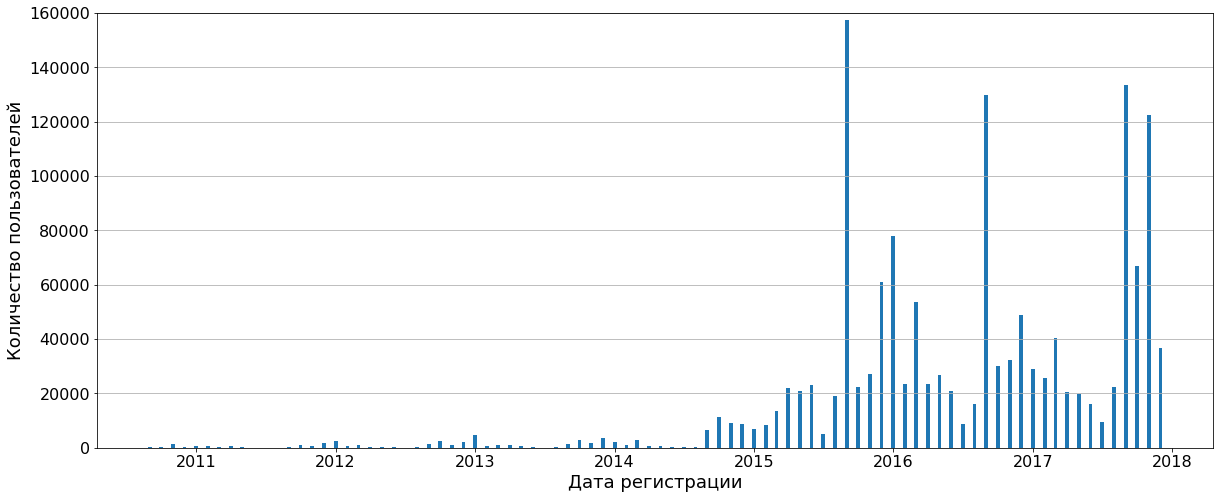

In [7]:
fig = plt.figure(figsize=(20,8))
fig.patch.set_facecolor('white')

months = mdates.YearLocator()
monthsFmt = mdates.DateFormatter('%Y')

ax = fig.gca()
ax.xaxis_date()
ax.tick_params(labelsize = 16)
plt.xlabel('Дата регистрации', fontsize=18)
plt.ylabel('Количество пользователей', fontsize=18)
ax.set_ylim(0, 160000)
ax.set_yticks(range(0, 170000, 20000))

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.bar(clients_by_months['reg_month'], clients_by_months['count'], width=10)
plt.grid(axis='y')
plt.title('Рис. 1. Распределение количества зарегистрировавшихся пользователей по времени', fontsize=20)
plt.title
plt.show()

## Количество и процент целевых пользователей по времени

In [9]:
target_clients_by_months = pd.read_csv('target_clients_by_months.csv', delimiter=",")

In [10]:
target_clients_by_months['sign_up_month'] = target_clients_by_months\
    .apply(lambda x: datetime.fromtimestamp(x['sign_up_month']), axis=1)

In [11]:
target_clients_by_months['not_paid_count'] = target_clients_by_months\
    .apply(lambda x: x['count'] - x['paid_count'], axis=1)

In [12]:
target_clients_by_months['paid_percent'] = target_clients_by_months\
    .apply(lambda x: x['paid_count']/x['count']*100, axis=1)

In [36]:
target_clients_by_months

,sign_up_month,paid_count,count,not_paid_count,paid_percent
0,2017-01-01 03:00:00,2460,28730,26270,8.562478
1,2017-02-01 03:00:00,1677,25513,23836,6.573120
2,2017-03-01 03:00:00,2021,40173,38152,5.030742
3,2017-04-01 03:00:00,1904,20334,18430,9.363627
4,2017-05-01 03:00:00,2061,19578,17517,10.527122
5,2017-06-01 03:00:00,2674,15820,13146,16.902655
6,2017-07-01 03:00:00,1449,9445,7996,15.341451
7,2017-08-01 03:00:00,2778,18451,15673,15.056095
8,2017-09-01 03:00:00,4276,120837,116561,3.538651
9,2017-10-01 03:00:00,2942,58795,55853,5.003827


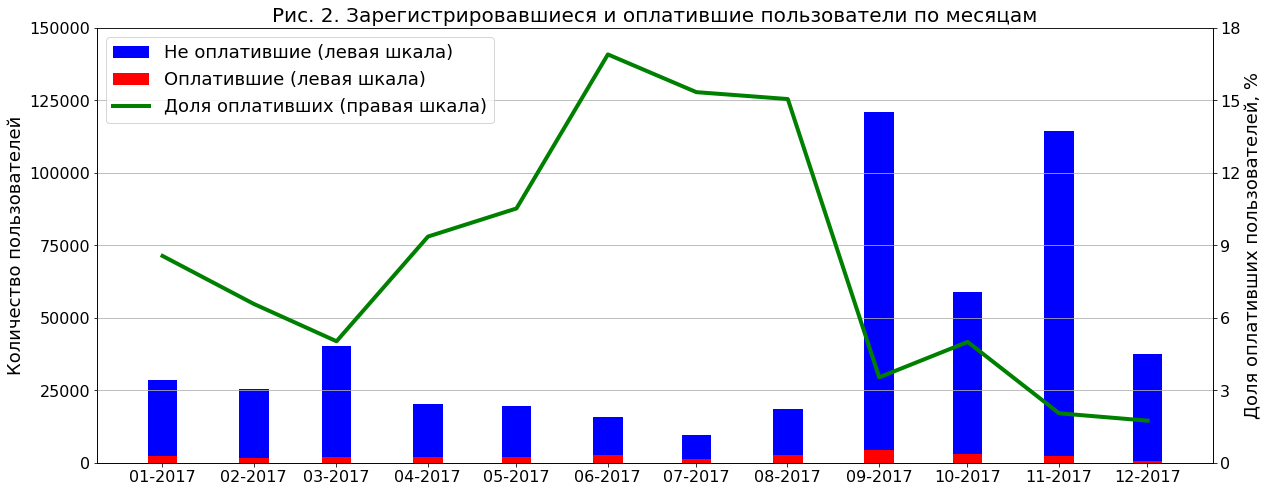

In [26]:
fig = plt.figure(figsize=(20,8))
fig.patch.set_facecolor('white')

months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%m-%Y')

x_labels = date2num(list(target_clients_by_months['sign_up_month']))

ax1 = fig.gca()
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(monthsFmt)
bars_not_paid = ax1.bar(x_labels, target_clients_by_months['count'], width=10, color='b')
bars_paid = ax1.bar(x_labels, target_clients_by_months['paid_count'], width=10, color='r')
ax1.xaxis_date()
ax1.tick_params(labelsize = 16)
ax1.set_ylabel('Количество пользователей', fontsize=18)
ax1.set_ylim(0, 120000)
ax1.set_yticks(range(0, 160000, 25000))

ax2 = ax1.twinx()
paid_share = ax2.plot(x_labels, target_clients_by_months['paid_percent'], color='g', linewidth=4.0)
ax2.tick_params(labelsize = 16)
ax2.set_ylabel('Доля оплативших пользователей, %', fontsize=18)
ax2.set_ylim(0, 18)
ax2.set_yticks(range(0, 19, 3))
plt.xlabel('Дата регистрации', fontsize=18)

plt.legend((bars_not_paid[0], bars_paid[0], paid_share[0]), \
           ('Не оплатившие (левая шкала)', 'Оплатившие (левая шкала)', 'Доля оплативших (правая шкала)'),\
           loc='upper left', prop={'size': 18})
# plt.legend((bars_not_paid[0], bars_paid[0]), \
#            ('Не оплатившие', 'Оплатившие'),\
#            loc='upper left', prop={'size': 18})

plt.grid(axis='y')
plt.title('Рис. 2. Зарегистрировавшиеся и оплатившие пользователи по месяцам', fontsize=20)
plt.show()

In [13]:
target_clients_by_months['count'].sum()

509583

## Количество пользователей по количеству дней, которое прошло от момента регистрации до первой оплаты

In [28]:
days_between_sign_up_and_payment = pd.read_csv('days_between_sign_up_and_payment.csv', delimiter=",")

In [29]:
threshold = 30

In [30]:
days_between_sign_up_and_payment[days_between_sign_up_and_payment['days_between_sign_up_and_payment'] <= 30]['count'].sum()

22409

In [31]:
days_between_sign_up_and_payment['count'].sum()

27239

In [32]:
days_between_sign_up_and_payment['days_between_sign_up_and_payment'] = days_between_sign_up_and_payment\
    .apply(lambda row: row['days_between_sign_up_and_payment'] if row['days_between_sign_up_and_payment'] <= threshold else threshold, axis=1)

In [33]:
days_between_sign_up_and_payment = days_between_sign_up_and_payment.groupby(['days_between_sign_up_and_payment'])['count'].sum().reset_index()

In [34]:
x_labels = list(map(str, range(0, threshold)))
x_labels.append('{0}+'.format(threshold))

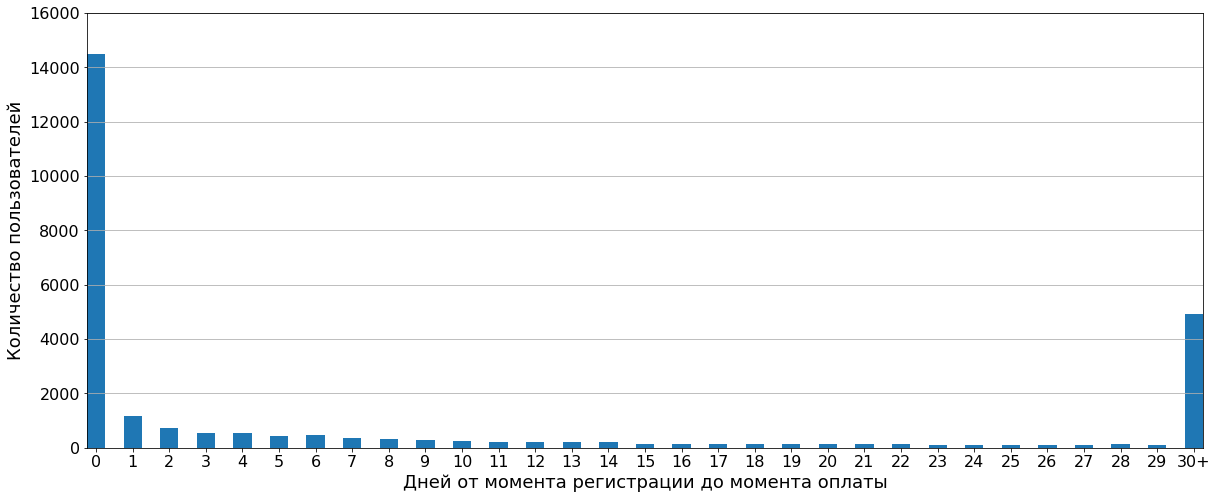

In [35]:
fig = plt.figure(figsize=(20,8))
fig.patch.set_facecolor('white')

ax = fig.gca()
ax.tick_params(labelsize = 16)
plt.xlabel('Дней от момента регистрации до момента оплаты', fontsize=18)
plt.ylabel('Количество пользователей', fontsize=18)
ax.set_ylim(0, 16000)
ax.set_xlim(-0.25, threshold + 0.25)
plt.xticks(range(0, threshold + 1, 1), x_labels)
ax.bar(days_between_sign_up_and_payment['days_between_sign_up_and_payment'], days_between_sign_up_and_payment['count'], width=0.5)
plt.grid(axis='y')
# plt.title('Рис 3. Количество оплативших пользователей в зависимости от времени от момента регистрации до момента оплаты', fontsize=18)
plt.show()

## Количество клиентов, по реферерам

In [224]:
reg_pages = pd.read_csv('reg_pages.csv', delimiter=",")

In [225]:
reg_pages = reg_pages.fillna("")\
    .groupby(['reg_page'])['count'].sum()\
    .reset_index()\
    .sort_values(by='count', ascending=False)

In [226]:
areas_count = 15

reg_pages_plt = reg_pages.head(areas_count - 1)

rest_count = reg_pages.tail(len(reg_pages.index) - areas_count + 1)['count'].sum()
df = pd.DataFrame(np.array([['Прочие', rest_count]]), columns=reg_pages.columns)
reg_pages_plt = reg_pages_plt.append(df)
reg_pages_plt = reg_pages_plt.reset_index(drop=True)

In [227]:
reg_pages['reg_page'].size

10028

In [228]:
total = reg_pages_plt['count'].astype(int).sum()
sizes = [(float(count)/total*100) for count in list(reg_pages_plt['count'])]
labels=['%1.1f%%, "%s"' % (s, l) for l, s in zip(reg_pages_plt['reg_page'], sizes)]

Text(0.5,1,'Рис. 4. Количество пользователей по страницам регистрации')

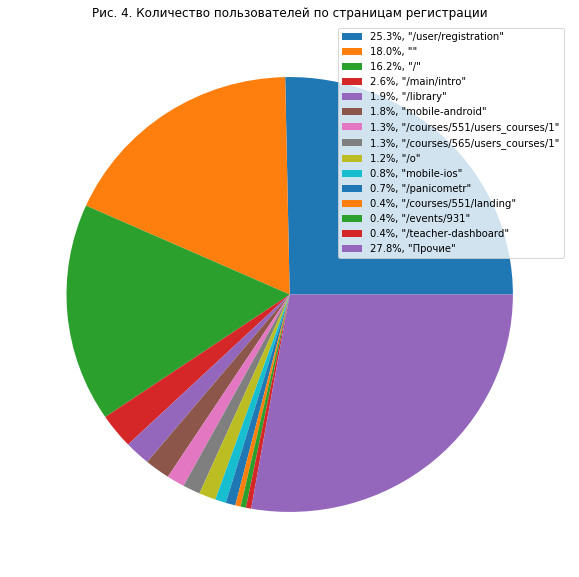

In [229]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')

mpl.rcParams['font.size'] = 10
plt.pie(reg_pages_plt['count'], labels=None)
plt.legend(loc="upper right", labels=labels) 
plt.title('Рис. 4. Количество пользователей по страницам регистрации')

## Количество пользователей по группам маркетинговых источников

In [197]:
source_groups = pd.read_csv('marketing_source_groups.csv', delimiter=",")

In [234]:
areas_count = 10

source_groups_plt = source_groups.head(areas_count - 1)

rest_count = source_groups.tail(len(source_groups.index) - areas_count + 1)['count'].sum()
df = pd.DataFrame(np.array([['Прочие', rest_count]]), columns=source_groups.columns)
source_groups_plt = source_groups_plt.append(df)
source_groups_plt = source_groups_plt.reset_index(drop=True)

Text(0.5,1,'Рис. 5. Количество пользователей по маркетинговым источникам')

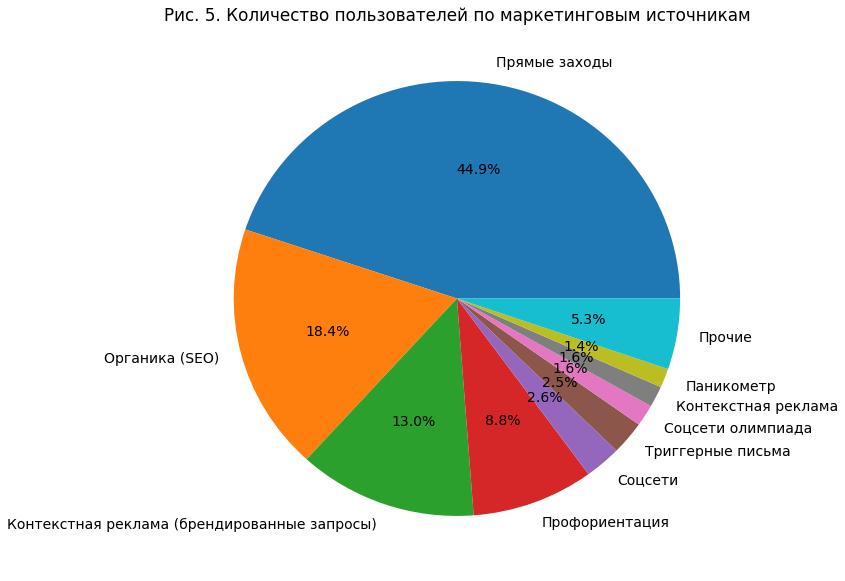

In [239]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
ax1 = fig.gca()
mpl.rcParams['font.size'] = 14
ax1.pie(list(source_groups_plt['count']), labels=list(source_groups_plt['name']), autopct='%1.1f%%')
plt.title('Рис. 5. Количество пользователей по маркетинговым источникам')